In [20]:
import matplotlib.pyplot as plt
import numpy as np

## Загружаем базу данных mnist

In [2]:
from mnist import load_mnist
train, validation, test = load_mnist()

Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Extracting MNIST-data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Extracting MNIST-data/train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting MNIST-data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting MNIST-data/t10k-labels-idx1-ubyte.gz


## Создаем массив картинок и массив подписей к ним

In [28]:
X = validation[0]
labels = validation[1]

## Выводим несколько картинок

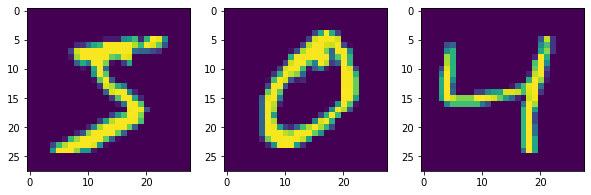

In [29]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
fig.set_figheight(3)
fig.set_figwidth(10)
ax1.imshow(X[0])
ax2.imshow(X[1])
ax3.imshow(X[2])

## Алгоритм PCA

In [118]:
class my_PCA(): 
    def __init__(self, n_components=None): 
        pass 
     
    def fit(X):
        Xc = np.empty([28, 28])
        mean = np.average(X, axis=0)
        for i in range(28):
            for j in range(28):
                Xc[i][j] = X[i][j][0] - mean[j]
        C = np.transpose(Xc).dot(Xc)
        lmbd, F = np.linalg.eig(C)
        return Xc, lmbd, F
        
    def transform(Xc, F): 
        Y = Xc * F
        return Y
     
    def fit_transform(X): 
        pass 


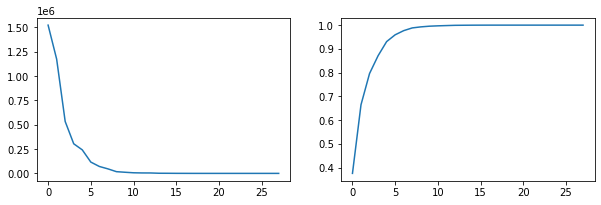

In [119]:
Xc, egnvals, egnvecs = my_PCA.fit(X[0])
#print(egnvals)
s = np.sum(egnvals)
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_figheight(3)
fig.set_figwidth(10)
ax1.plot(egnvals)
kumsum = np.empty(28)
ss = 0
for i in range(28):
    ss += egnvals[i]
    kumsum[i] = ss/s
ax2.plot(kumsum)

Судя по всему, первые 15 компонент покрывают почти сто процентов дисперсии данных. 
Собственные числа и дисперсия данных связаны напрямую: с помощью собственных чисел можно описать дисперсию данных

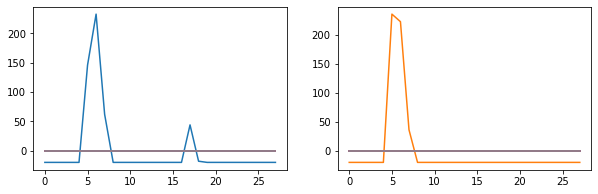

In [120]:
Y1 = my_PCA.transform(Xc, egnvecs[0])
Y2 = my_PCA.transform(Xc, egnvecs[1])
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_figheight(3)
fig.set_figwidth(10)
ax1.plot(Y1)
ax2.plot(Y2)

В общем, линейная разделимость классов присутствует и хорошо предсказывает тестовые данные